In [1]:
import pandas as pd
import numpy as np

In [50]:
import matplotlib.pyplot as plt

In [2]:
data = []
with open('household_power_consumption.txt', 'r') as f:
    for i in list(f):
        x = i.split(';')
        data.append(x)
len(data)

2075260

In [94]:
date_cols = []
for i in data[1:]:
    date_cols.append(i[0])

In [95]:
data_set = [[],[],[],[],[],[],[],[],[]]
for i in data[1:]:
    for d in list(range(9)):
        try:
            data_set[d].append(eval(i[d].strip()))
        except:
            data_set[d].append(i[d].strip())

In [96]:
main_df = pd.DataFrame()

In [97]:
n = 0
for i in data_set:
    main_df[cols[n]] = i
    n+=1

In [98]:
main_df['Date'] = date_cols
for col in main_df.columns[:2]:
    main_df[col] = pd.to_datetime(main_df[col])

In [99]:
for col in main_df.columns[2:]:
    main_df[col] = pd.to_numeric(main_df[col], errors='coerce')

In [100]:
main_df.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [101]:
for col in main_df.columns[2:]:
    main_df[col] = main_df[col].fillna(np.mean(main_df[col]))
main_df.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [102]:
main_df.set_index('Date', inplace=True)
main_df.head()

,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,,
2006-12-16,2020-10-15 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16,2020-10-15 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16,2020-10-15 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16,2020-10-15 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16,2020-10-15 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [105]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 to 2010-11-26
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Time                   datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 142.5 MB


In [106]:
main_df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.050655e+00,1.120142e-01,3.219643e+00,4.416490e+00,6.114397e+00,5.785470e+00,8.384178e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.300000e-01,1.020000e-01,2.409600e+02,2.800000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [107]:
main_df.groupby('Date').mean()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Date,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972
...,...,...,...,...,...,...,...
2010-12-07,0.770538,0.198550,240.218646,3.397222,1.197222,0.448611,4.475000
2010-12-08,0.367846,0.117429,240.794931,1.623750,0.000000,0.356944,2.765278
2010-12-09,1.119508,0.139832,241.619722,4.755694,1.253472,1.444444,6.174306


In [103]:
df_copy = main_df.copy()

In [109]:
df_weekly = df_copy.resample('W').mean()
len(df_weekly)

209

Text(0, 0.5, 'Voltage')

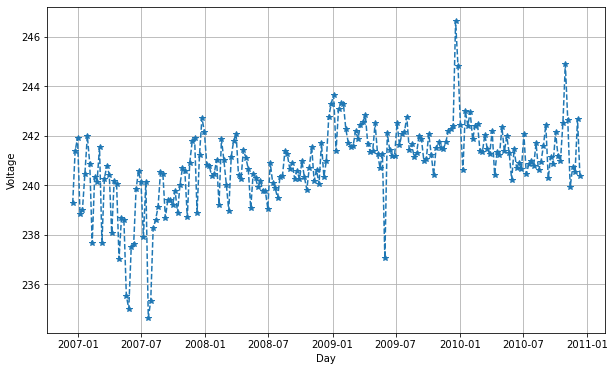

In [111]:
plt.figure(figsize=(10,6))
plt.plot(df_weekly.index, df_weekly.Voltage, '--', marker='*', )
plt.grid()
plt.xlabel('Week')
plt.ylabel('Voltage')

In [115]:
main_df.to_csv('household_power_consumption.csv', index=False)

In [ ]:
rcParams['figure.figsize'] = 15, 8
decompose_series = sm.tsa.seasonal_decompose(df_yearly['Voltage'], model='additive')
decompose_series.plot()
plt.show()

In [108]:
df_yearly = df_copy.resample('Y').mean()
len(df_yearly)

5

In [104]:
daily_df = df_copy.resample('D').mean()
len(daily_df)

1457